# Import modules needed

In [1]:
%%time
import sys
sys.path.append('..')

Wall time: 0 ns


In [3]:
%%time
from source.code.data_downloader import DataDownloader
from source.code.custom_tokenizer import CustomTokenizer
from source.code.word_to_vec_transformer import WordToVecTransformer
from source.code.doc_to_vec_transformer import Doc2VecTransformer
from source.code.metrics import metrics_report
from source.code.visualization import choose_n_clusters

Wall time: 0 ns


In [4]:
%%time
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.pipeline import Pipeline

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

from sklearn.decomposition import LatentDirichletAllocation as LDA

from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns

Wall time: 102 ms


Fix one random state across all notebook cells

In [5]:
%%time
random_state = 0

Wall time: 0 ns


# Read data

In [6]:
%%time
data_downloader = DataDownloader('../data/datasets/')


INITIALIZING...
INITIALIZATION HAS BEEN COMPLETED


Wall time: 5 ms


In [10]:
%%time
documents, labels_true = data_downloader.extract_documents(docs_count_per_topic=100)

Files reading and documents extraction: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 31.77it/s]


Wall time: 641 ms


# TF-IDF documents representation

In [13]:
%%time
pipeline = Pipeline([
    ('tokenize', CustomTokenizer()),
    ('vectorize', CountVectorizer()),
    ('inverse', TfidfTransformer(smooth_idf=True))
])

Wall time: 510 µs


In [14]:
%%time
tf_idf_documents = pipeline.fit_transform(documents)

Documents tokenization: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:15<00:00, 130.52it/s]


Wall time: 15.7 s


In [15]:
%%time
tf_idf_documents.shape

Wall time: 0 ns


(2000, 29424)

# LDA documents representation

In [16]:
%%time
pipeline = Pipeline([
    ('tokenize', CustomTokenizer()),
    ('vectorize', CountVectorizer()),
    ('lda', LDA(n_components=100, random_state=random_state, verbose=10, learning_method='batch', n_jobs=-1))
])

Wall time: 999 µs


In [17]:
%%time
lda_documents = pipeline.fit_transform(documents)

Documents tokenization: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:06<00:00, 294.85it/s]
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    1.6s remaining:    5.0s
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:    2.1s remaining:    3.5s
[Parallel(n_jobs=8)]: Done   4 out of   8 | elapsed:    2.5s remaining:    2.5s
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:    3.1s remaining:    1.8s
[Parallel(n_jobs=8)]: Done   6 out of   8 | elapsed:    3.3s remaining:    1.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    3.7s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    3.7s finished


iteration: 1 of max_iter: 10


[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    1.1s remaining:    3.6s
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:    1.2s remaining:    2.1s
[Parallel(n_jobs=8)]: Done   4 out of   8 | elapsed:    1.3s remaining:    1.3s
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:    1.5s remaining:    0.9s
[Parallel(n_jobs=8)]: Done   6 out of   8 | elapsed:    1.6s remaining:    0.5s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    1.8s finished


iteration: 2 of max_iter: 10


[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    0.6s remaining:    2.1s
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:    0.8s remaining:    1.4s
[Parallel(n_jobs=8)]: Done   4 out of   8 | elapsed:    0.9s remaining:    0.9s
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:    1.1s remaining:    0.6s
[Parallel(n_jobs=8)]: Done   6 out of   8 | elapsed:    1.1s remaining:    0.3s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    1.3s finished


iteration: 3 of max_iter: 10


[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    0.8s remaining:    2.5s
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:    0.8s remaining:    1.4s
[Parallel(n_jobs=8)]: Done   4 out of   8 | elapsed:    1.0s remaining:    1.0s
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:    1.0s remaining:    0.6s
[Parallel(n_jobs=8)]: Done   6 out of   8 | elapsed:    1.1s remaining:    0.3s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    1.3s finished


iteration: 4 of max_iter: 10


[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    0.8s remaining:    2.6s
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:    0.9s remaining:    1.5s
[Parallel(n_jobs=8)]: Done   4 out of   8 | elapsed:    1.1s remaining:    1.1s
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:    1.1s remaining:    0.6s
[Parallel(n_jobs=8)]: Done   6 out of   8 | elapsed:    1.2s remaining:    0.3s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    1.4s finished


iteration: 5 of max_iter: 10


[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    0.8s remaining:    2.7s
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:    0.9s remaining:    1.6s
[Parallel(n_jobs=8)]: Done   4 out of   8 | elapsed:    1.0s remaining:    1.0s
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:    1.1s remaining:    0.6s
[Parallel(n_jobs=8)]: Done   6 out of   8 | elapsed:    1.2s remaining:    0.3s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    1.4s finished


iteration: 6 of max_iter: 10


[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    0.8s remaining:    2.5s
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:    0.9s remaining:    1.5s
[Parallel(n_jobs=8)]: Done   4 out of   8 | elapsed:    0.9s remaining:    0.9s
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:    1.0s remaining:    0.6s
[Parallel(n_jobs=8)]: Done   6 out of   8 | elapsed:    1.2s remaining:    0.3s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    1.3s finished


iteration: 7 of max_iter: 10


[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    0.6s remaining:    2.1s
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:    0.8s remaining:    1.4s
[Parallel(n_jobs=8)]: Done   4 out of   8 | elapsed:    0.9s remaining:    0.9s
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:    1.1s remaining:    0.6s
[Parallel(n_jobs=8)]: Done   6 out of   8 | elapsed:    1.2s remaining:    0.3s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    1.3s finished


iteration: 8 of max_iter: 10


[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    0.6s remaining:    2.1s
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:    0.8s remaining:    1.4s
[Parallel(n_jobs=8)]: Done   4 out of   8 | elapsed:    0.8s remaining:    0.8s
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:    1.0s remaining:    0.6s
[Parallel(n_jobs=8)]: Done   6 out of   8 | elapsed:    1.2s remaining:    0.3s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    1.3s finished


iteration: 9 of max_iter: 10


[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    0.9s remaining:    2.8s
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:    0.9s remaining:    1.6s
[Parallel(n_jobs=8)]: Done   4 out of   8 | elapsed:    1.0s remaining:    1.0s
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:    1.1s remaining:    0.6s
[Parallel(n_jobs=8)]: Done   6 out of   8 | elapsed:    1.3s remaining:    0.4s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    1.4s finished


iteration: 10 of max_iter: 10


[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    0.9s remaining:    3.0s
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:    1.2s remaining:    2.0s
[Parallel(n_jobs=8)]: Done   4 out of   8 | elapsed:    1.4s remaining:    1.4s
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:    1.6s remaining:    0.9s
[Parallel(n_jobs=8)]: Done   6 out of   8 | elapsed:    1.8s remaining:    0.5s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    2.3s finished
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    1.0s remaining:    3.1s
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:    1.2s remaining:    2.1s
[Parallel(n_jobs=8)]: Done   4 out of   8 | elapsed:    1.4s remaining:    1.4s
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:    1.7s remaining:    1.0s
[Parallel(n_jobs=8)]: Done   6 out of   8 | elapsed:    1.9s remaining:    0.6s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapse

Wall time: 32.3 s


In [18]:
%%time
lda_documents.shape

Wall time: 0 ns


(2000, 100)

# Word2Vec representation

In [19]:
%%time
pipeline = Pipeline([
    ('tokenize', CustomTokenizer()),
    ('w2v', WordToVecTransformer(100))
])

Wall time: 11.5 ms


In [20]:
%%time
w2v_documents = pipeline.fit_transform(documents)

Documents tokenization: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:06<00:00, 303.66it/s]


Wall time: 8.17 s


In [21]:
%%time
w2v_documents.shape

Wall time: 0 ns


(2000, 100)

# K-Means Clustering with known clusters count

## TF-IDF

In [22]:
%%time
kmeans = KMeans(n_clusters=20, random_state=random_state)

Wall time: 0 ns


In [23]:
%%time
labels_tf_idf_pred = kmeans.fit_predict(tf_idf_documents)

Wall time: 18.7 s


## LDA

In [24]:
%%time
kmeans = KMeans(n_clusters=20, random_state=random_state)

Wall time: 1 ms


In [25]:
%%time
labels_lda_pred = kmeans.fit_predict(lda_documents)

Wall time: 296 ms


## W2V

In [26]:
%%time
kmeans = KMeans(n_clusters=20, random_state=random_state)

Wall time: 0 ns


In [27]:
%%time
labels_w2v_pred = kmeans.fit_predict(w2v_documents)

Wall time: 457 ms


# Metrics calculation

### Confusion matrix

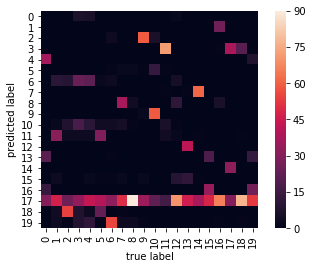

Wall time: 292 ms


In [28]:
%%time
mat = metrics.confusion_matrix(labels_true, labels_tf_idf_pred)
sns.heatmap(mat.T, square=True, fmt='d')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

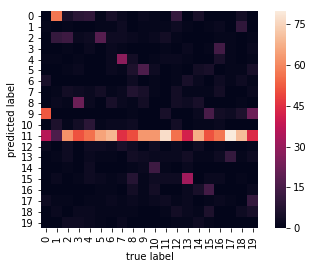

Wall time: 240 ms


In [29]:
%%time
mat = metrics.confusion_matrix(labels_true, labels_lda_pred)
sns.heatmap(mat.T, square=True, fmt='d')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

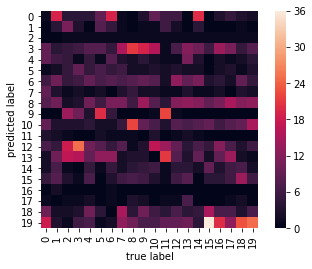

Wall time: 244 ms


In [30]:
%%time
mat = metrics.confusion_matrix(labels_true, labels_w2v_pred)
sns.heatmap(mat.T, square=True, fmt='d')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

### Other metrics (with/without ground-truth labels)

In [31]:
metrcs = metrics_report(
    ['kmeans_tf_idf', 'kmeans_lda', 'kmeans_w2v'],
    [tf_idf_documents.toarray(), lda_documents, w2v_documents],
    [labels_tf_idf_pred, labels_lda_pred, labels_w2v_pred],
    labels_true
)

In [32]:
metrcs

,AR,MI,AMI,NMI,SC,CHI
kmeans_tf_idf,0.080550,1.159332,0.365847,0.445784,0.013456,5.222184
kmeans_lda,0.018850,0.455584,0.122069,0.189821,0.118949,38.846347
kmeans_w2v,0.024554,0.294627,0.068871,0.102391,0.207253,664.518178


# K-Means Clustering without known clusters count

## TF-IDF

In [33]:
n_clusters = [15, 20, 25, 30]

For n_clusters = 15 The average silhouette_score is : 0.012476139008
For n_clusters = 15 The standard deviation of silhouette_score is : 0.0239736309903
For n_clusters = 15 The min value of silhouette_score is : -0.0236278476462
For n_clusters = 15 The max value of silhouette_score is : 0.163452603954


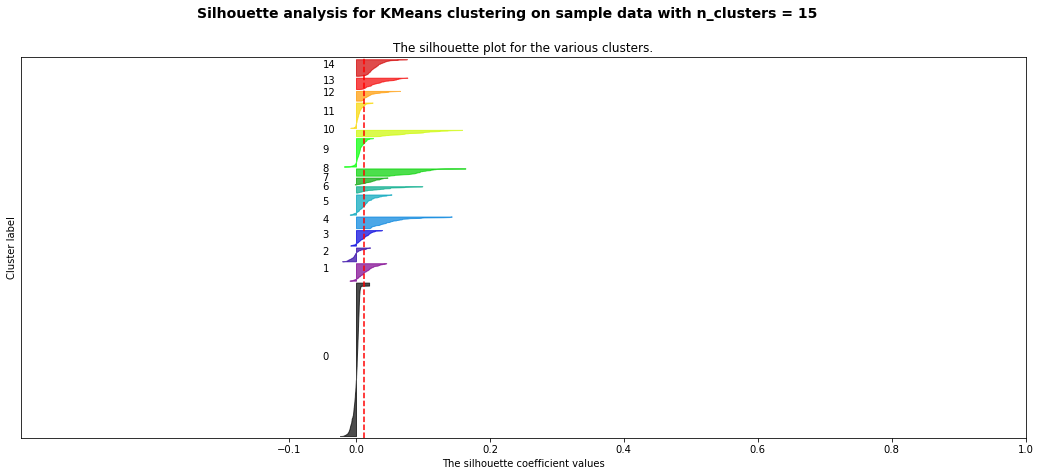

For n_clusters = 20 The average silhouette_score is : 0.0134564817996
For n_clusters = 20 The standard deviation of silhouette_score is : 0.0295645440186
For n_clusters = 20 The min value of silhouette_score is : -0.0442095449501
For n_clusters = 20 The max value of silhouette_score is : 0.177926417086


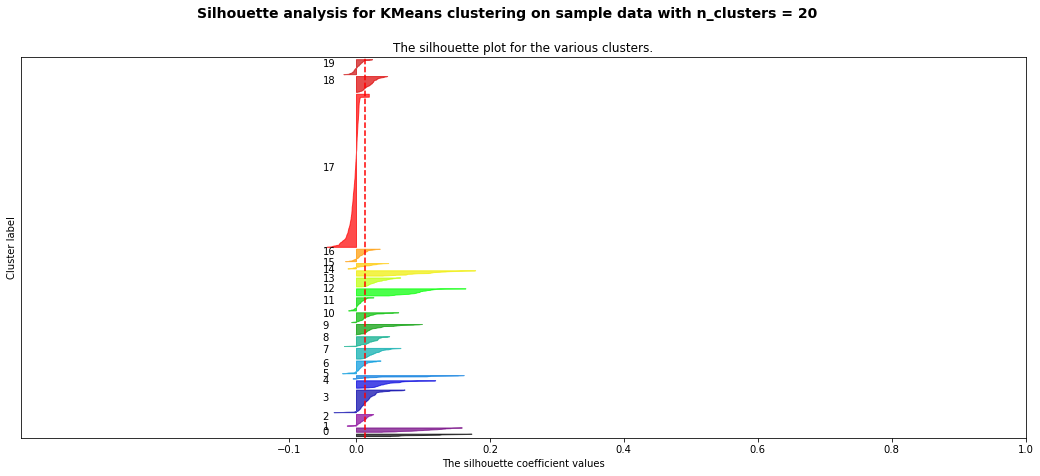

For n_clusters = 25 The average silhouette_score is : 0.0162146956738
For n_clusters = 25 The standard deviation of silhouette_score is : 0.0332773642185
For n_clusters = 25 The min value of silhouette_score is : -0.0685880566241
For n_clusters = 25 The max value of silhouette_score is : 0.328911306889


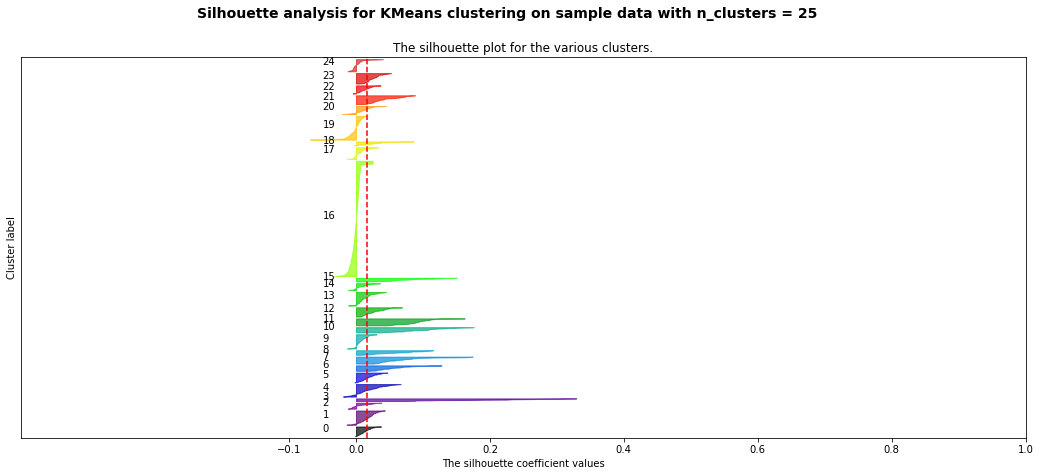

For n_clusters = 30 The average silhouette_score is : 0.0165572689608
For n_clusters = 30 The standard deviation of silhouette_score is : 0.0354364715851
For n_clusters = 30 The min value of silhouette_score is : -0.0530144211205
For n_clusters = 30 The max value of silhouette_score is : 0.325334875249


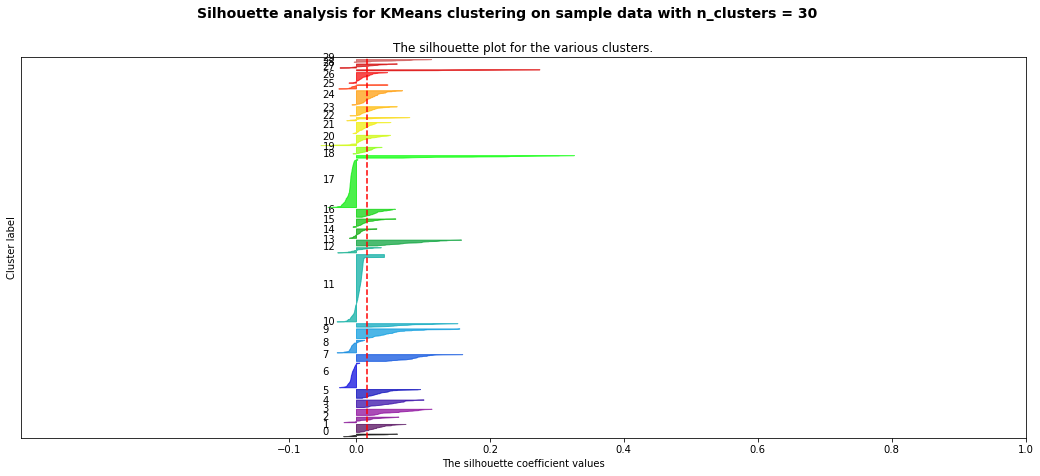

In [34]:
choose_n_clusters(n_clusters, tf_idf_documents.toarray(), random_state)

## LDA

In [35]:
n_clusters = [15, 20, 25, 30]

For n_clusters = 15 The average silhouette_score is : 0.077644225483
For n_clusters = 15 The standard deviation of silhouette_score is : 0.280585357859
For n_clusters = 15 The min value of silhouette_score is : -0.337876958315
For n_clusters = 15 The max value of silhouette_score is : 0.880007904438


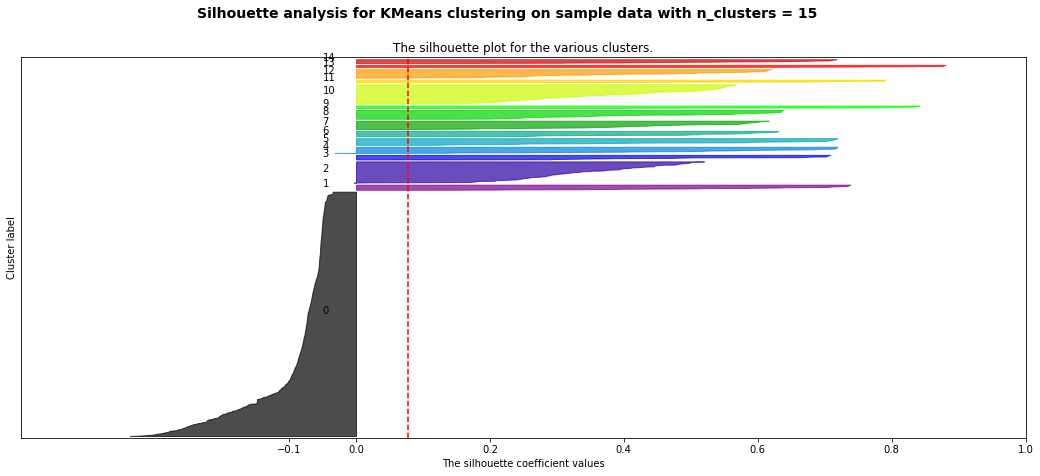

For n_clusters = 20 The average silhouette_score is : 0.118948934318
For n_clusters = 20 The standard deviation of silhouette_score is : 0.286024365396
For n_clusters = 20 The min value of silhouette_score is : -0.373571280926
For n_clusters = 20 The max value of silhouette_score is : 0.784778623246


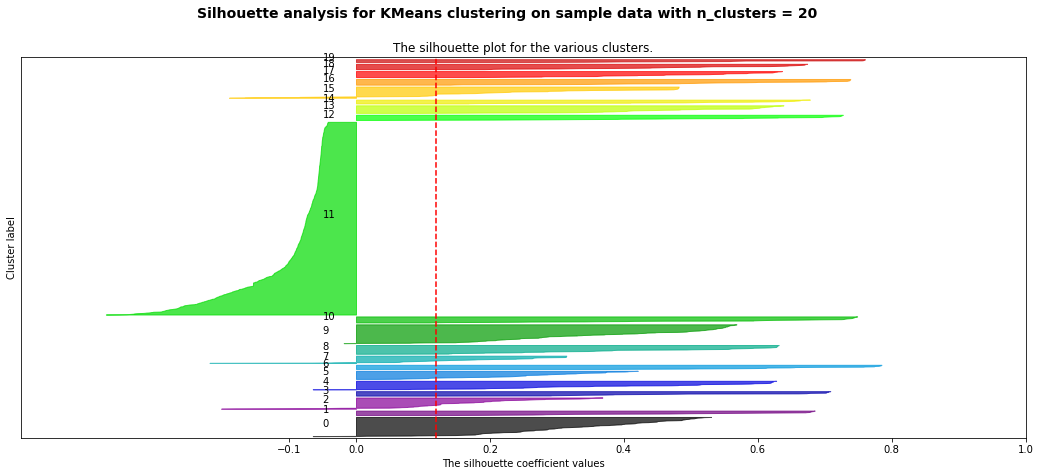

For n_clusters = 25 The average silhouette_score is : 0.153016001354
For n_clusters = 25 The standard deviation of silhouette_score is : 0.310914518317
For n_clusters = 25 The min value of silhouette_score is : -0.35846509831
For n_clusters = 25 The max value of silhouette_score is : 0.905402324711


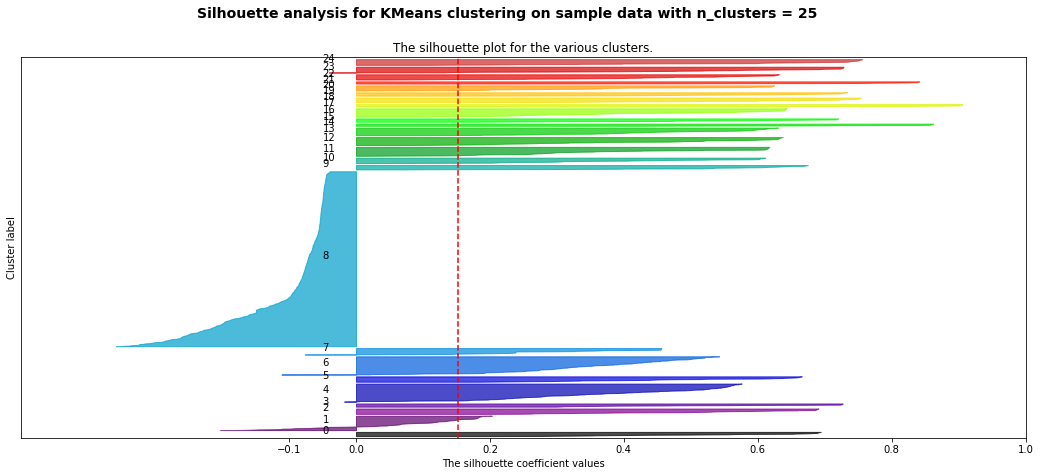

For n_clusters = 30 The average silhouette_score is : 0.184445853427
For n_clusters = 30 The standard deviation of silhouette_score is : 0.323802131936
For n_clusters = 30 The min value of silhouette_score is : -0.374203762839
For n_clusters = 30 The max value of silhouette_score is : 0.90521560672


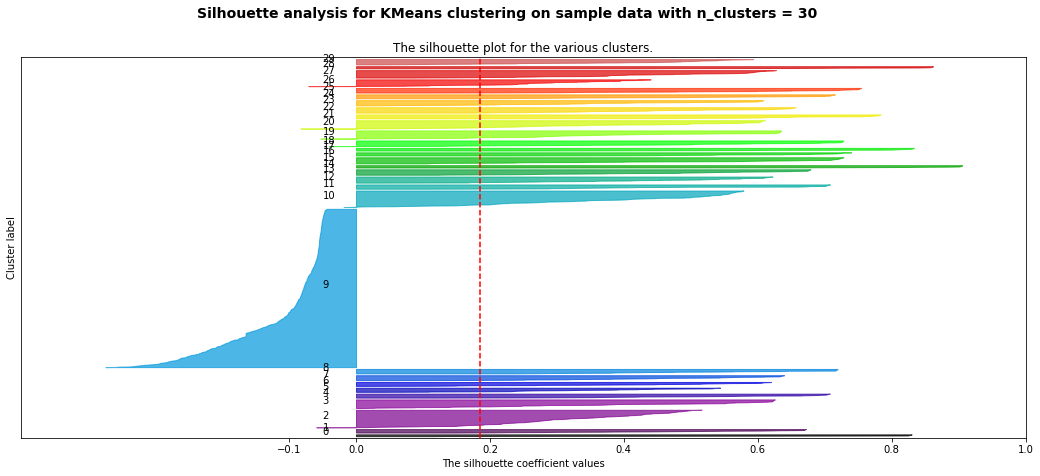

In [36]:
choose_n_clusters(n_clusters, lda_documents, random_state)

## W2V

In [37]:
n_clusters = [15, 20, 25, 30]

For n_clusters = 15 The average silhouette_score is : 0.224014862192
For n_clusters = 15 The standard deviation of silhouette_score is : 0.166917491458
For n_clusters = 15 The min value of silhouette_score is : -0.196596382272
For n_clusters = 15 The max value of silhouette_score is : 1.0


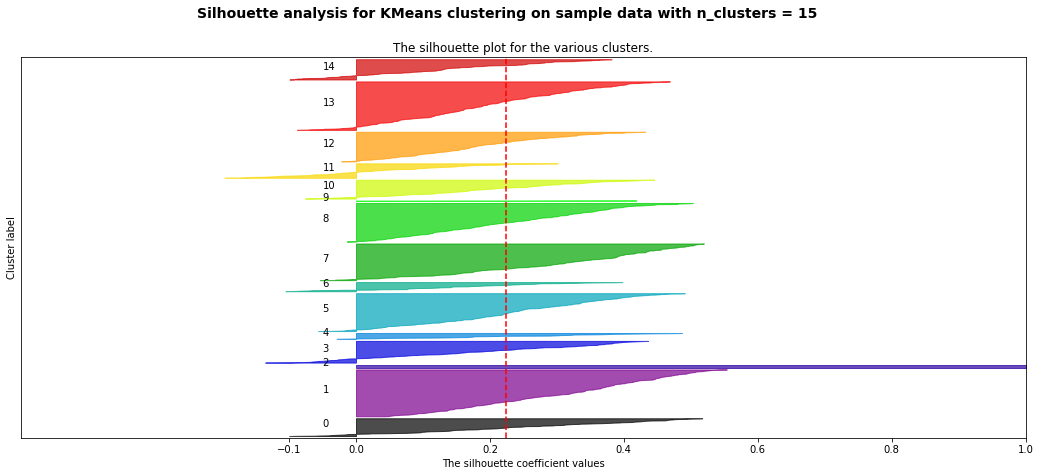

For n_clusters = 20 The average silhouette_score is : 0.207253089927
For n_clusters = 20 The standard deviation of silhouette_score is : 0.159406465494
For n_clusters = 20 The min value of silhouette_score is : -0.156229406671
For n_clusters = 20 The max value of silhouette_score is : 1.0


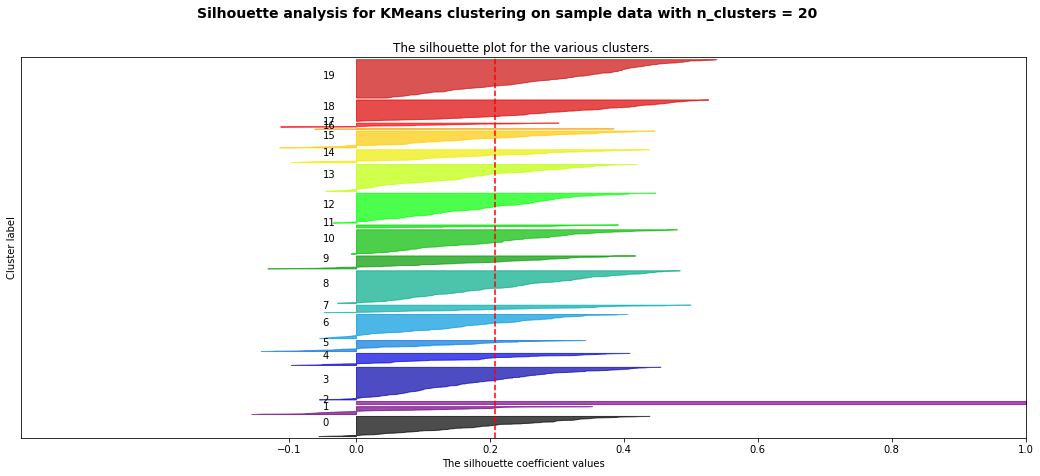

For n_clusters = 25 The average silhouette_score is : 0.205031012844
For n_clusters = 25 The standard deviation of silhouette_score is : 0.154446740694
For n_clusters = 25 The min value of silhouette_score is : -0.153375085422
For n_clusters = 25 The max value of silhouette_score is : 1.0


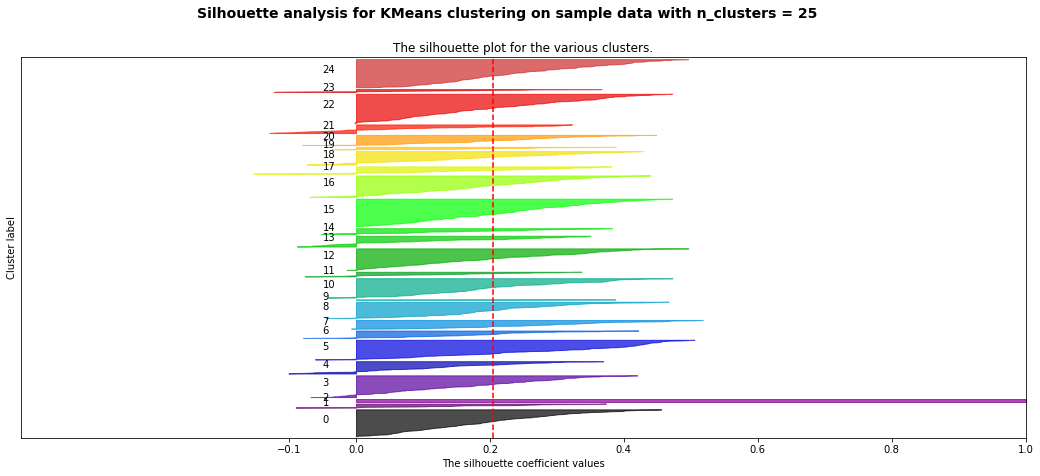

For n_clusters = 30 The average silhouette_score is : 0.204319258556
For n_clusters = 30 The standard deviation of silhouette_score is : 0.156129814745
For n_clusters = 30 The min value of silhouette_score is : -0.18829988565
For n_clusters = 30 The max value of silhouette_score is : 1.0


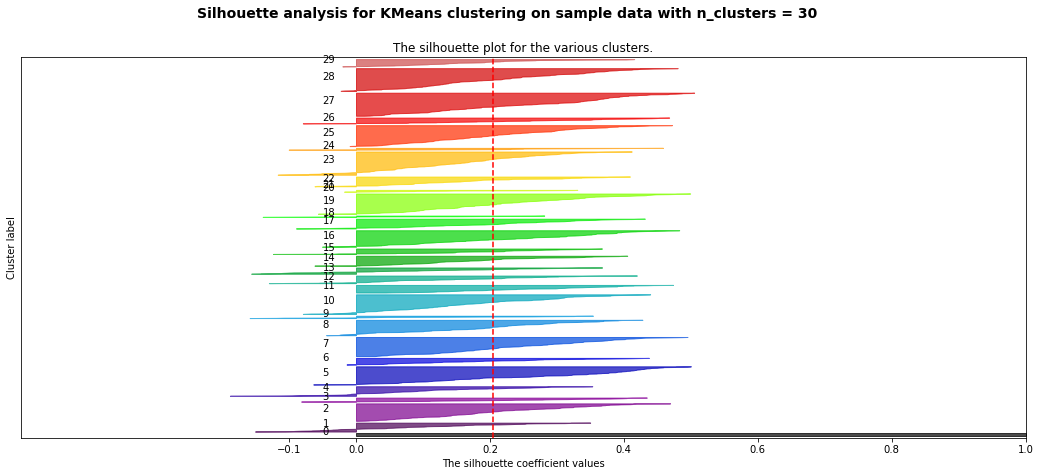

In [38]:
choose_n_clusters(n_clusters, w2v_documents, random_state)

# Other Algorithms

## DBSCAN

## TF-IDF

In [39]:
%%time
db_scan = DBSCAN()

Wall time: 0 ns


In [40]:
%%time
labels_tf_idf_pred = db_scan.fit_predict(tf_idf_documents)

Wall time: 255 ms


## LDA

In [41]:
%%time
db_scan = DBSCAN()

Wall time: 0 ns


In [42]:
%%time
labels_lda_pred = db_scan.fit_predict(lda_documents)

Wall time: 1.33 s


## W2V

In [43]:
%%time
db_scan = DBSCAN()

Wall time: 487 µs


In [44]:
%%time
labels_w2v_pred = db_scan.fit_predict(w2v_documents)

Wall time: 1.57 s


# Metrics calculation

### Confusion matrix

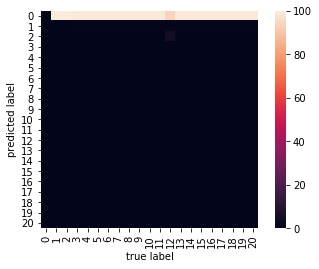

Wall time: 250 ms


In [45]:
%%time
mat = metrics.confusion_matrix(labels_true, labels_tf_idf_pred)
sns.heatmap(mat.T, square=True, fmt='d')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

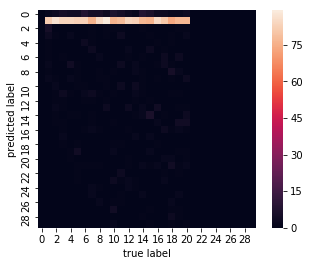

Wall time: 198 ms


In [46]:
%%time
mat = metrics.confusion_matrix(labels_true, labels_lda_pred)
sns.heatmap(mat.T, square=True, fmt='d')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

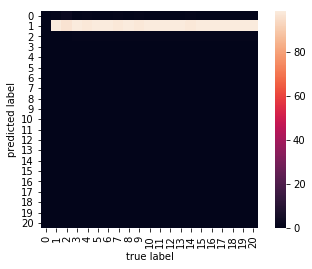

Wall time: 245 ms


In [47]:
%%time
mat = metrics.confusion_matrix(labels_true, labels_w2v_pred)
sns.heatmap(mat.T, square=True, fmt='d')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

### Other metrics (with/without ground-truth labels)

In [48]:
%%time
metrcs = metrics_report(
    ['db_scan_tf_idf', 'db_scan_lda', 'db_scan_w2v'],
    [tf_idf_documents.toarray(), lda_documents, w2v_documents],
    [labels_tf_idf_pred, labels_lda_pred, labels_w2v_pred],
    labels_true
)

Wall time: 2.67 s


In [49]:
metrcs

,AR,MI,AMI,NMI,SC,CHI
db_scan_tf_idf,0.000005,0.008506,-0.000269,0.018734,-0.272477,2.495851
db_scan_lda,0.000193,0.181608,0.014910,0.101631,0.083077,14.836600
db_scan_w2v,-0.000016,0.006277,-0.001276,0.013036,0.700537,316.417587


## Agglomerative Clustering

## TF-IDF

In [50]:
%%time
aggl_clust = AgglomerativeClustering(n_clusters=20)

Wall time: 0 ns


In [51]:
%%time
labels_tf_idf_pred = db_scan.fit_predict(tf_idf_documents)

Wall time: 204 ms


## LDA

In [52]:
%%time
aggl_clust = AgglomerativeClustering(n_clusters=20)

Wall time: 0 ns


In [53]:
%%time
labels_tf_idf_pred = db_scan.fit_predict(lda_documents)

Wall time: 1.35 s


## W2V

In [54]:
%%time
aggl_clust = AgglomerativeClustering(n_clusters=20)

Wall time: 0 ns


In [55]:
%%time
labels_tf_idf_pred = db_scan.fit_predict(w2v_documents)

Wall time: 1.59 s


# Metrics calculation

### Confusion matrix

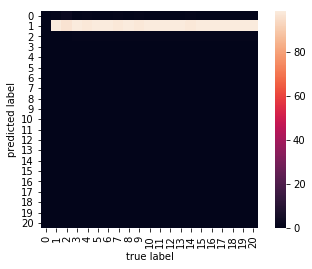

Wall time: 241 ms


In [56]:
%%time
mat = metrics.confusion_matrix(labels_true, labels_tf_idf_pred)
sns.heatmap(mat.T, square=True, fmt='d')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

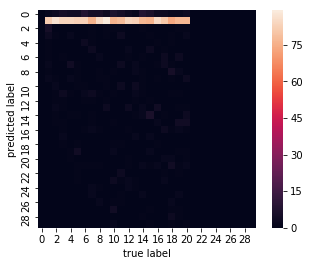

Wall time: 206 ms


In [57]:
%%time
mat = metrics.confusion_matrix(labels_true, labels_lda_pred)
sns.heatmap(mat.T, square=True, fmt='d')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

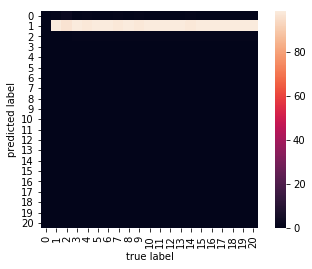

Wall time: 242 ms


In [58]:
%%time
mat = metrics.confusion_matrix(labels_true, labels_w2v_pred)
sns.heatmap(mat.T, square=True, fmt='d')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

### Other metrics (with/without ground-truth labels)

In [59]:
%%time
metrcs = metrics_report(
    ['aggl_clust', 'aggl_clust', 'aggl_clust'],
    [tf_idf_documents.toarray(), lda_documents, w2v_documents],
    [labels_tf_idf_pred, labels_lda_pred, labels_w2v_pred],
    labels_true
)

Wall time: 2.63 s


In [60]:
metrcs

,AR,MI,AMI,NMI,SC,CHI
aggl_clust,-0.000016,0.006277,-0.001276,0.013036,-0.274891,0.708738
aggl_clust,0.000193,0.181608,0.014910,0.101631,0.083077,14.836600
aggl_clust,-0.000016,0.006277,-0.001276,0.013036,0.700537,316.417587
